# Benchmarks for Water Distribution System environment

The notebook provides testing and comparison between deterministic policies and a pretrained RL agent strategies among the `WaterDistributionSystemEnv` environment.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/gym4ReaL


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from gymnasium.utils.env_checker import check_env
import gymnasium as gym

from gym4real.envs.wds.utils import parameter_generator

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context("paper")
plot_colors = sns.color_palette('colorblind')
sns.set(font_scale=1.2)

alg_color = OrderedDict({
    'random': plot_colors[1],
    'default': plot_colors[2],
    'only_78': plot_colors[3],
    'q-learning': plot_colors[0],
    'sarsa': plot_colors[4],
    'dqn': plot_colors[5],
    'ppo': plot_colors[6],
    'only_79': plot_colors[7]
})

alg_markers = OrderedDict({
    'random': '.',
    'longest_first': 'o',
    'shortest_first': 's',
    'q-learning': 's',
    'sarsa': 's',
})

alg_labels = {
    'random': 'Random',
    'default': 'Default',
    'only_78': 'P78',
    'q-learning': 'Q-Learning',
    'sarsa': 'SARSA',
    'dqn': 'DQN',
    'ppo': 'PPO',
    'only_79': 'P79'
}

In [4]:
n_episodes = 10
rewards = defaultdict(dict)

## Random Policy
The action is chosen randomly at each decision step.

In [5]:
params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=1234)
env = gym.make(id="gym4real/wds-v0", **{'settings':params})

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [6]:
alg = 'random'
rewards[alg] = {}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset(options={'is_evaluation': True})
    done = False
    rewards[alg][episode] = []

    while not done:
        action = env.action_space.sample()  # Randomly select an action
        obs, reward, terminated, truncated, info = env.step(action)  # Return observation and reward
        done = terminated or truncated
        rewards[alg][episode].append(list(info['pure_rewards'].values()))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.43s/it]


### Only Pump 78 Always Active
The action chosen is the fixed action 2 (mening that the Pump 78 is always active).

In [7]:
params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=1234)
env = gym.make(id="gym4real/wds-v0", **{'settings':params})

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [8]:
alg = 'only_78'
rewards[alg] = {}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset(options={'is_evaluation': True})
    done = False
    rewards[alg][episode] = []

    while not done:
        action = 2  # Only pump 78 active
        obs, reward, terminated, truncated, info = env.step(action)  # Return observation and reward
        done = terminated or truncated
        rewards[alg][episode].append(list(info['pure_rewards'].values()))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.25s/it]


### Only Pump 79 Always Active
The action chosen is the fixed action 1 (mening that the Pump 78 is always active).

In [9]:
params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=1234)
env = gym.make(id="gym4real/wds-v0", **{'settings':params})

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [10]:
alg = 'only_79'
rewards[alg] = {}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset(options={'is_evaluation': True})
    done = False
    rewards[alg][episode] = []

    while not done:
        action = 1  # Only pump 79 active
        obs, reward, terminated, truncated, info = env.step(action)  # Return observation and reward
        done = terminated or truncated
        rewards[alg][episode].append(list(info['pure_rewards'].values()))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.14s/it]


### Default control rules
We compare with the defult control rules provided within `.inp` files. In this case, the Anytown section of control states:
```inp
[CONTROLS]
;LINK P78  OPEN    IF NODE T41                BELOW  5
;LINK P78  CLOSED  IF NODE T41                ABOVE  8
;LINK P79  OPEN    IF NODE T42                BELOW  5
;LINK P79  CLOSED  IF NODE T42                ABOVE  8
```

In [11]:
params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=1234)
env = gym.make(id="gym4real/wds-v0", **{'settings':params})

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [12]:
alg = 'default'
rewards[alg] = {}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset(options={'is_evaluation': True})
    done = False
    rewards[alg][episode] = []

    # The action is a number within {0,1,2,3}
    # 0 -> 00 -> P78 closed, P79 closed
    # 1 -> 01 -> P78 closed, P79 open
    # 2 -> 10 -> P78 open, P79 closed
    # 3 -> 11 -> P78 open, P79 open
    
    while not done:
        pumps = info['pumps'].copy()
        for pump_id, tank_id in zip(info['pumps'].keys(), info['tanks'].keys()):
            if info['tanks'][tank_id] < 5.:
                pumps[pump_id] = 1
            elif info['tanks'][tank_id] > 8.:
                pumps[pump_id] = 0
            else:
                pumps[pump_id] = info['pumps'][pump_id]

        action = 2 * pumps['P78'] + pumps['P79']
        obs, reward, terminated, truncated, info = env.step(action)  # Return observation and reward
        done = terminated or truncated
        rewards[alg][episode].append(list(info['pure_rewards'].values()))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.16s/it]


## DQN Agent

In [13]:
# Uncomment this line to install stable-baselines3
#!pip install stable-baselines3

In [14]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from gym4real.envs.wds.env import WaterDistributionSystemEnv

In [15]:
params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=1234)
env = make_vec_env('gym4real/wds-v0', n_envs=1, env_kwargs={'settings':params})

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/envs/registration.py:734: UserWarning: WARN: The environment is being initialised with render_mode='rgb_array' that is not in the possible render_modes ([]).
  logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [16]:
alg = 'dqn'
rewards[alg] = {}

model = DQN('MlpPolicy', env, verbose=1)
vec_env = model.get_env()
model = DQN.load("examples/wds/trained_models/DQN_1h_step")
for episode in tqdm(range(n_episodes)):
    vec_env.set_options({'is_evaluation': True})
    obs = vec_env.reset()
    
    done = False
    rewards[alg][episode] = []
    
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)  # Return observation and reward
        done = done[0]
        rewards[alg][episode].append(list(info[0]['pure_rewards'].values()))

Using cpu device


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.08s/it]


## Comparison between the different baselines

In [17]:
# Notice that since the episodes do not have the same length (due to internal simulator steps), 
# we have to consider the samples referring to the same elapsed time.
"""

rewards_same_len = {}

for alg in rewards.keys():
    # Get the set of times for each profile
    profile_times = []
    for profile in rewards[alg].values():
        times = set([entry[0] for entry in profile])
        profile_times.append(times)
    
    # Find common times across all profiles
    common_times = sorted(set.intersection(*profile_times))

    # Filter each profile to keep only entries with times in common_times
    rewards_same_len[alg] = {}
    for key, values in rewards[alg].items():
        filtered = [val[1] for val in values if val[0] in common_times]
        rewards_same_len[alg][key] = filtered
"""

'\n\nrewards_same_len = {}\n\nfor alg in rewards.keys():\n    # Get the set of times for each profile\n    profile_times = []\n    for profile in rewards[alg].values():\n        times = set([entry[0] for entry in profile])\n        profile_times.append(times)\n\n    # Find common times across all profiles\n    common_times = sorted(set.intersection(*profile_times))\n\n    # Filter each profile to keep only entries with times in common_times\n    rewards_same_len[alg] = {}\n    for key, values in rewards[alg].items():\n        filtered = [val[1] for val in values if val[0] in common_times]\n        rewards_same_len[alg][key] = filtered\n'

In [18]:
rewards.keys()

dict_keys(['random', 'only_78', 'only_79', 'default', 'dqn'])

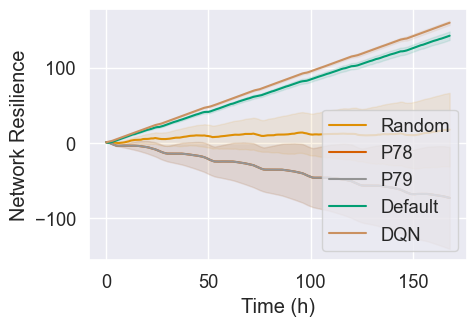

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for i, alg in enumerate(rewards.keys()):
    cum_rewards = []
    for episode in range(n_episodes): 
        cum_rewards.append(np.cumsum([rewards[alg][episode][i][0] - rewards[alg][episode][i][1] for i in range(len(rewards[alg][episode]))]))
    means = np.mean(cum_rewards, axis=0)
    stds = np.std(cum_rewards, axis=0)
    ci = 1.96 * stds / np.sqrt(len(rewards[alg].keys()))

    ax.plot(means, label=alg_labels[alg], color=alg_color[alg])
    ax.fill_between(range(len(means)), means + ci, means - ci, color=alg_color[alg], alpha=0.1)

# Set axis labels
ax.set_xlabel("Time (h)")
ax.set_ylabel("Network Resilience")

# Set scientific notation for y-axis
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add legend
ax.legend()

# Save figure
plt.savefig('plots/wds_avg_reward.pdf')

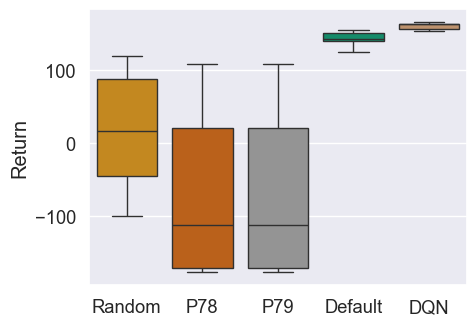

In [32]:
from matplotlib.ticker import ScalarFormatter

# Prepare data for boxplot
box_data = {}
colors = []

cum_rewards = []

# Collect the final cumulative reward for each episode of each algorithm
for alg in rewards.keys():
    box_data[alg_labels[alg]] = []  # Use human-readable labels
    for episode in range(n_episodes): 
        box_data[alg_labels[alg]].append(np.sum([rewards[alg][episode][i][0] - rewards[alg][episode][i][1] for i in range(len(rewards[alg][episode]))]))
    colors.append(alg_color[alg])  # Store color for consistency in plotting

# Create the boxplot
fig, ax = plt.subplots(figsize=(5, 3.5), tight_layout=True)
box_plot = sns.boxplot(data=box_data, palette=colors, width=0.8, ax=ax)

# Label the axes
ax.set_ylabel("Return")

# Use scientific notation on y-axis
formatter = ScalarFormatter()
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 3))  # Show scientific notation when appropriate
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig("plots/wds_boxplot.pdf")